In [52]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from datetime import datetime

# 1) Loading the dataset
Loading the dataset and removing columns that are not needed.

In [54]:
# load the ED visits dataset with all the features
df_event_log_visits = pd.read_csv('df_visits_dur_timeofday.csv')

In [55]:
# dropping columns that were added earlier for analytics
df_event_log_visits.drop(['Duration', 'Duration_seconds', 'Earliest_Time'], axis=1, inplace=True)

In [56]:
# these are the remaining columns in the dataset as of now
df_event_log_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301212 entries, 0 to 301211
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SID                      301212 non-null  object 
 1   SEX                      301212 non-null  object 
 2   DOB                      301208 non-null  object 
 3   DOD                      11463 non-null   object 
 4   ED_POSTAL_CODE           300415 non-null  object 
 5   FACILITY_ID              301212 non-null  object 
 6   FACILITY_NAME            301212 non-null  object 
 7   VISIT_ID                 301212 non-null  object 
 8   VISIT_AGE                301208 non-null  float64
 9   CTAS                     298986 non-null  float64
 10  DEPART_DISPOSITION_ID    300782 non-null  object 
 11  DEPART_DISPOSITION_DESC  300782 non-null  object 
 12  Activity                 301212 non-null  object 
 13  Start_Time               301212 non-null  object 
 14  End_

# 2) Dealing with missing values

## DOB

In [57]:
# DOB is the first column with missing values - there are in total for rows 4 missing values - these rows can be droppped

#  Removing records with missing DOB
df_event_log_visits = df_event_log_visits.dropna(subset=['DOB'])

df_event_log_visits.info()



# Next is DOD, however the missing value in this case indicates that the patient is still alive, hence getting rid of these values 
# would lead to losing important information - this column will be dealt with in later step.


<class 'pandas.core.frame.DataFrame'>
Index: 301208 entries, 0 to 301211
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SID                      301208 non-null  object 
 1   SEX                      301208 non-null  object 
 2   DOB                      301208 non-null  object 
 3   DOD                      11463 non-null   object 
 4   ED_POSTAL_CODE           300411 non-null  object 
 5   FACILITY_ID              301208 non-null  object 
 6   FACILITY_NAME            301208 non-null  object 
 7   VISIT_ID                 301208 non-null  object 
 8   VISIT_AGE                301208 non-null  float64
 9   CTAS                     298982 non-null  float64
 10  DEPART_DISPOSITION_ID    300778 non-null  object 
 11  DEPART_DISPOSITION_DESC  300778 non-null  object 
 12  Activity                 301208 non-null  object 
 13  Start_Time               301208 non-null  object 
 14  End_Time 

## POSTAL_CODE

In [58]:
# Another column with missing values is the postal code, in this case I decided to fill in the values based on the value of the hospital
# that the patient visited

# Filtering the df to only include rows where ED_POSTAL_CODE is missing
missing_postal_code = df_event_log_visits[df_event_log_visits['ED_POSTAL_CODE'].isnull()]

# Printing the rows with missing ED_POSTAL_CODE
print(missing_postal_code)

               SID SEX         DOB  DOD ED_POSTAL_CODE FACILITY_ID  \
708     STDY111908   F  1946-05-05  NaN            NaN         HSC   
709     STDY111908   F  1946-05-05  NaN            NaN         HSC   
710     STDY111908   F  1946-05-05  NaN            NaN         HSC   
711     STDY111908   F  1946-05-05  NaN            NaN         HSC   
1226    STDY112659   M  1956-12-01  NaN            NaN         GBC   
...            ...  ..         ...  ...            ...         ...   
301203  STDY768042   F  1976-12-17  NaN            NaN         SCM   
301204  STDY768042   F  1976-12-17  NaN            NaN         SCM   
301205  STDY768042   F  1976-12-17  NaN            NaN         SCM   
301206  STDY768042   F  1976-12-17  NaN            NaN         SCM   
301207  STDY768042   F  1976-12-17  NaN            NaN         SCM   

                                         FACILITY_NAME      VISIT_ID  \
708                 Health Sciences Centre - St. Johns  VISIT2257195   
709            

In [59]:
# Counting occurrences of each FACILITY_ID in the DataFrame with missing postal codes
facility_counts = missing_postal_code['FACILITY_ID'].value_counts()

# Printing the counts
print(facility_counts)


FACILITY_ID
HSC    414
SCM    220
GBC    111
CGH     41
BUR     11
Name: count, dtype: int64


In [60]:
facility_postal_map = {
    'HSC': 'A1B 3V6',
    'GBC': 'A5A 1K3',
    'SCM': 'A1C 5B8',
    'BUR': 'A0E 1E0',
    'CGH': 'A1Y 1A4'
}

# Applying the map to the 'FACILITY_ID' column to create a new 'Imputed_Postal_Code' column
df_event_log_visits['Imputed_Postal_Code'] = df_event_log_visits['FACILITY_ID'].map(facility_postal_map)

# Filling missing 'ED_POSTAL_CODE' values with the imputed values from 'Imputed_Postal_Code'
df_event_log_visits['ED_POSTAL_CODE'].fillna(df_event_log_visits['Imputed_Postal_Code'], inplace=True)

# dropping the column
df_event_log_visits.drop('Imputed_Postal_Code', axis=1, inplace=True)


In [61]:
# Checking if there are any remaining missing values in 'ED_POSTAL_CODE'
print(df_event_log_visits['ED_POSTAL_CODE'].isnull().sum())


0


In [62]:
df_event_log_visits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301208 entries, 0 to 301211
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SID                      301208 non-null  object 
 1   SEX                      301208 non-null  object 
 2   DOB                      301208 non-null  object 
 3   DOD                      11463 non-null   object 
 4   ED_POSTAL_CODE           301208 non-null  object 
 5   FACILITY_ID              301208 non-null  object 
 6   FACILITY_NAME            301208 non-null  object 
 7   VISIT_ID                 301208 non-null  object 
 8   VISIT_AGE                301208 non-null  float64
 9   CTAS                     298982 non-null  float64
 10  DEPART_DISPOSITION_ID    300778 non-null  object 
 11  DEPART_DISPOSITION_DESC  300778 non-null  object 
 12  Activity                 301208 non-null  object 
 13  Start_Time               301208 non-null  object 
 14  End_Time 

## CTAS

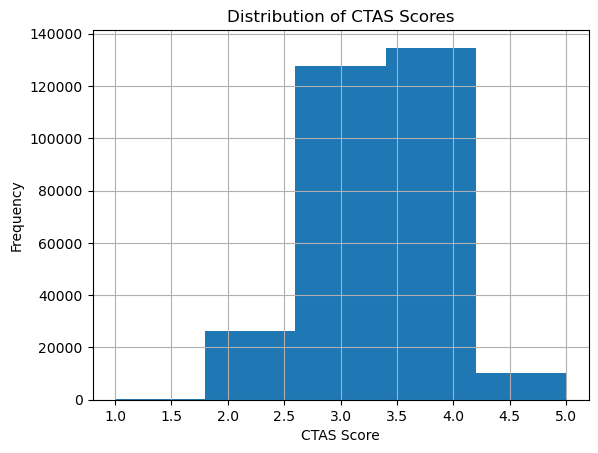

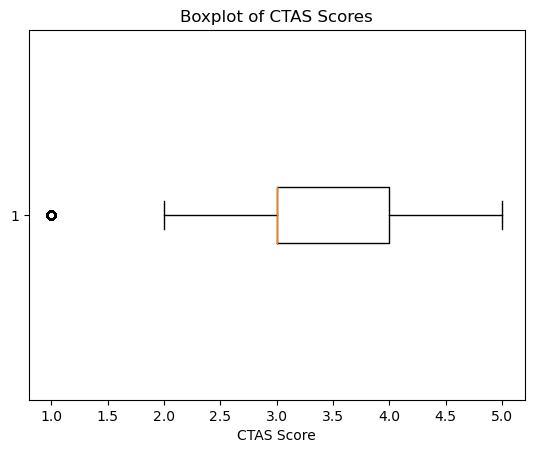

count    298982.000000
mean          3.430344
std           0.702471
min           1.000000
25%           3.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: CTAS, dtype: float64


In [63]:
# Next missing values are in the case of CTAS column 

# Histogram to see the distribution of CTAS scores
df_event_log_visits['CTAS'].hist(bins=5)
plt.title('Distribution of CTAS Scores')
plt.xlabel('CTAS Score')
plt.ylabel('Frequency')
plt.show()

# Boxplot to see the spread and check for outliers
plt.boxplot(df_event_log_visits['CTAS'].dropna(), vert=False)
plt.title('Boxplot of CTAS Scores')
plt.xlabel('CTAS Score')
plt.show()

# Descriptive statistics
print(df_event_log_visits['CTAS'].describe())


After imputation, remaining missing values in 'CTAS': 0


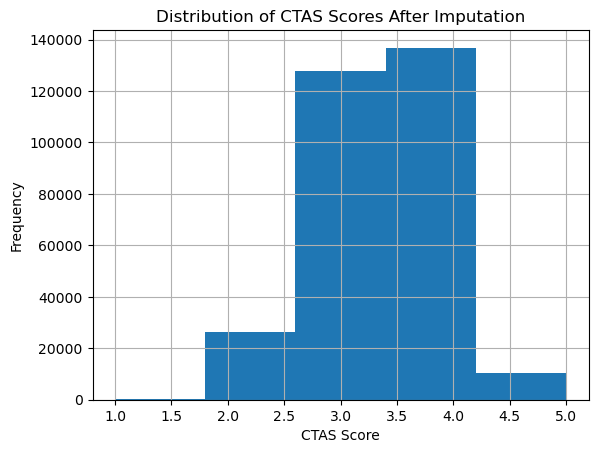

In [64]:
mode_ctas = df_event_log_visits['CTAS'].mode()[0]
mode_ctas

# Imputing missing values with the mode
df_event_log_visits['CTAS'].fillna(mode_ctas, inplace=True)

# Verifying no missing values
print(f"After imputation, remaining missing values in 'CTAS': {df_event_log_visits['CTAS'].isnull().sum()}")

# the distribution after imputation
df_event_log_visits['CTAS'].hist(bins=5)
plt.title('Distribution of CTAS Scores After Imputation')
plt.xlabel('CTAS Score')
plt.ylabel('Frequency')
plt.show()

In [65]:
df_event_log_visits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301208 entries, 0 to 301211
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SID                      301208 non-null  object 
 1   SEX                      301208 non-null  object 
 2   DOB                      301208 non-null  object 
 3   DOD                      11463 non-null   object 
 4   ED_POSTAL_CODE           301208 non-null  object 
 5   FACILITY_ID              301208 non-null  object 
 6   FACILITY_NAME            301208 non-null  object 
 7   VISIT_ID                 301208 non-null  object 
 8   VISIT_AGE                301208 non-null  float64
 9   CTAS                     301208 non-null  float64
 10  DEPART_DISPOSITION_ID    300778 non-null  object 
 11  DEPART_DISPOSITION_DESC  300778 non-null  object 
 12  Activity                 301208 non-null  object 
 13  Start_Time               301208 non-null  object 
 14  End_Time 

## DEPART_DISPOSITION_ID

In [66]:
# Departing disposition is one of the values I will be predicting with the model 
# (TRIAGED LEFT W/O BEING SEEN and REGISTERED LEFT W/O BEING SEEN)
# hence I decided to not deal with the missing values at this moment - however, we only need one of the columns
df_event_log_visits['DEPART_DISPOSITION_DESC'].unique()

array(['TRIAGED LEFT W/O BEING SEEN', 'DISCHARGED W/O SUPPORT SERV',
       'LEFT AGAINST MEDICAL ADVICE', 'ADMITTED',
       'INIT RX LEFT BEFORE COMPLETE', 'TRANSFER TO OTHER', nan,
       'REGISTERED LEFT W/O BEING SEEN', 'ASSESSED LEFT BEFORE TREATMENT',
       'DISCHARGED WITH SUPPORT SERV', 'TRANSFER TO OTHER ACUTE CARE',
       'TRANSFER TO CONTINUING CARE', 'DIED IN FACILITY',
       'TRANSFER TO LONG TERM CARE', 'TRSF TO CORRECTIONAL FACILITY'],
      dtype=object)

In [68]:
df_event_log_visits.drop(['DEPART_DISPOSITION_DESC'], axis=1, inplace=True)

In [69]:
dispositions_counts =  df_event_log_visits['DEPART_DISPOSITION_ID'].value_counts()

# Print the counts
print(dispositions_counts)

DEPART_DISPOSITION_ID
D        245904
TLWBS     32484
ADM       16861
TTO        3027
ITLBC       878
RLWBS       770
AMA         347
TA          152
EXP         127
ALBT        111
DS           47
TC           45
TL           14
TCC          11
Name: count, dtype: int64


# 3) Preprocessing columns
In the next steps I am preprocessing and cleaning data in all columns that will be used by the deep learning model.

## SEX

In [70]:
# preprocessing the SEX column

df_event_log_visits['SEX'].value_counts()

SEX
F    166092
M    135055
U        61
Name: count, dtype: int64

In [71]:
# Encode 'M' as 0 and 'F' as 1 and 'U' as 2
df_event_log_visits['SEX'] = df_event_log_visits['SEX'].map({'M': 0, 'F': 1, 'U': 2})
df_event_log_visits

,SID,SEX,DOB,DOD,ED_POSTAL_CODE,FACILITY_ID,FACILITY_NAME,VISIT_ID,VISIT_AGE,CTAS,DEPART_DISPOSITION_ID,Activity,Start_Time,End_Time,Duration_hours,TIME_OF_THE_DAY
0,STDY111126,1,1997-01-19,NaN,A0B 3K0,HSC,Health Sciences Centre - St. Johns,VISIT2354278,26.166667,3.0,TLWBS,Triage,2023-03-04 23:08:00+00:00,2023-03-05 00:30:00+00:00,1.366667,Evening to Night
1,STDY111126,1,1997-01-19,NaN,A0B 3K0,HSC,Health Sciences Centre - St. Johns,VISIT2354278,26.166667,3.0,TLWBS,Providing service,2023-03-04 23:09:00+00:00,2023-03-05 00:30:00+00:00,1.366667,Evening to Night
2,STDY111126,1,1997-01-19,NaN,A0B 3K0,HSC,Health Sciences Centre - St. Johns,VISIT2354278,26.166667,3.0,TLWBS,Patient departed,2023-03-05 00:30:00+00:00,2023-03-05 00:30:00+00:00,1.366667,Evening to Night
3,STDY111131,1,2000-05-02,NaN,A0E 1P0,HSC,Health Sciences Centre - St. Johns,VISIT2233914,22.000000,4.0,D,Triage,2022-05-30 08:10:00+00:00,2022-05-30 11:20:00+00:00,3.166667,Late Morning to Late Afternoon
4,STDY111131,1,2000-05-02,NaN,A0E 1P0,HSC,Health Sciences Centre - St. Johns,VISIT2233914,22.000000,4.0,D,Providing service,2022-05-30 08:21:00+00:00,2022-05-30 11:20:00+00:00,3.166667,Late Morning to Late Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301207,STDY768042,1,1976-12-17,NaN,A1C 5B8,SCM,St. Clares Mercy Hospital - St. Johns,VISIT2377797,46.333333,3.0,ADM,Patient discharge,2023-05-03 12:28:00+00:00,2023-05-03 12:28:00+00:00,70.550000,Late Morning to Late Afternoon
301208,STDY768044,0,1959-04-26,NaN,A1Y 1A6,CGH,Carbonear General Hospital - Carbonear,VISIT2339165,63.750000,4.0,D,Triage,2023-01-25 08:20:00+00:00,2023-01-25 14:00:00+00:00,5.666667,Late Morning to Late Afternoon
301209,STDY768044,0,1959-04-26,NaN,A1Y 1A6,CGH,Carbonear General Hospital - Carbonear,VISIT2339165,63.750000,4.0,D,Providing service,2023-01-25 08:50:00+00:00,2023-01-25 14:00:00+00:00,5.666667,Late Morning to Late Afternoon
301210,STDY768044,0,1959-04-26,NaN,A1Y 1A6,CGH,Carbonear General Hospital - Carbonear,VISIT2339165,63.750000,4.0,D,Assessment,2023-01-25 13:55:00+00:00,2023-01-25 14:00:00+00:00,5.666667,Late Morning to Late Afternoon


## DATE OF BIRTH

In [72]:
# preprocessing the DOB column

# converting the 'DOB' column to datetime
df_event_log_visits['DOB'] = pd.to_datetime(df_event_log_visits['DOB'])


## 3.1) Creating new features based on the old features
Here, I am creating new features based on the available features in the dataset.

## DATE OF DEATH and IS_DECEASED

In [74]:
# Preprocessing the DOD column by creating a binary indicator from DOD
df_event_log_visits['Is_Deceased'] = df_event_log_visits['DOD'].notnull().astype(int)

df_event_log_visits['DOD'] = pd.to_datetime(df_event_log_visits['DOD'], errors='coerce')

df_event_log_visits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301208 entries, 0 to 301211
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   SID                    301208 non-null  object        
 1   SEX                    301208 non-null  int64         
 2   DOB                    301208 non-null  datetime64[ns]
 3   DOD                    11463 non-null   datetime64[ns]
 4   ED_POSTAL_CODE         301208 non-null  object        
 5   FACILITY_ID            301208 non-null  object        
 6   FACILITY_NAME          301208 non-null  object        
 7   VISIT_ID               301208 non-null  object        
 8   VISIT_AGE              301208 non-null  float64       
 9   CTAS                   301208 non-null  float64       
 10  DEPART_DISPOSITION_ID  300778 non-null  object        
 11  Activity               301208 non-null  object        
 12  Start_Time             301208 non-null  object   

## AREA_TYPE

In [76]:
# identifying rural or urban area based on the postal code according to
# https://www.canadapost-postescanada.ca/cpc/en/support/articles/addressing-guidelines/postal-codes.page

# Function to determine if a postal code is urban or rural
def urban_rural_classifier(postal_code):
    # Check the second character of the postal code
    if postal_code[1] == '0':
        return 'rural'
    else:
        return 'urban'

# Apply the function to classify each postal code
df_event_log_visits['Area_Type'] = df_event_log_visits['ED_POSTAL_CODE'].apply(urban_rural_classifier)

# Verify by displaying the DataFrame
print(df_event_log_visits[['ED_POSTAL_CODE', 'Area_Type']].head())

  ED_POSTAL_CODE Area_Type
0        A0B 3K0     rural
1        A0B 3K0     rural
2        A0B 3K0     rural
3        A0E 1P0     rural
4        A0E 1P0     rural


## COORDINATES

In [77]:
# adding latutide and longitude table from geonames
file_path = 'CA_full.txt'
postal_codes = pd.read_csv(file_path, delimiter='\t', names=[
    'Country', 'Postal_Code', 'Place_Name', 'Province', 'Province_Code',
    'Unnamed5', 'Unnamed6', 'Unnamed7', 'Unnamed8', 'Latitude', 'Longitude', 'Extra'
], skiprows=1)  # skiprows=1 to skip the example header row you pasted

# Dropping the unnecessary columns
postal_codes.drop(columns=['Unnamed5', 'Unnamed6', 'Unnamed7', 'Unnamed8', 'Extra'], inplace=True)

# Displaying the dataframe to ensure it loaded correctly
print(postal_codes.head())


  Country Postal_Code    Place_Name Province Province_Code  Latitude  \
0      CA     T0A 0A1   Saddle Lake  Alberta            AB   54.0029   
1      CA     T0A 0A2  Cherry Grove  Alberta            AB   54.3603   
2      CA     T0A 0A3       Glendon  Alberta            AB   54.3455   
3      CA     T0A 0A4     Lindbergh  Alberta            AB   54.3455   
4      CA     T0A 0A5       St Lina  Alberta            AB   54.3455   

   Longitude  
0  -111.7000  
1  -110.0863  
2  -111.6157  
3  -111.6157  
4  -111.6157  


In [78]:
# Merging the dataframes
df_event_log_visits = df_event_log_visits.merge(postal_codes, left_on='ED_POSTAL_CODE', right_on='Postal_Code', how='left')

# Checking for missing latitude and longitude after the merge
print(df_event_log_visits[['Latitude', 'Longitude']].isnull().sum())


Latitude     4692
Longitude    4692
dtype: int64


In [79]:
# some of the postal codes can not be found on geonames as they are - the closest coordinates can be found by using
# only the first three digits
postal_codes['First_3_Digits'] = postal_codes['Postal_Code'].str[:3]


In [80]:
# rows where 'Latitude' or 'Longitude' is missing 
df_event_log_visits_missing_lat = df_event_log_visits[df_event_log_visits['Latitude'].isnull() | df_event_log_visits['Longitude'].isnull()]

# creating nnew column
df_event_log_visits_missing_lat['First_3_Digits'] = df_event_log_visits['ED_POSTAL_CODE'].str[:3]
df_event_log_visits_missing_lat

C:\Users\ksteflova\AppData\Local\Temp\ipykernel_5628\2478119479.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_event_log_visits_missing_lat['First_3_Digits'] = df_event_log_visits['ED_POSTAL_CODE'].str[:3]


,SID,SEX,DOB,DOD,ED_POSTAL_CODE,FACILITY_ID,FACILITY_NAME,VISIT_ID,VISIT_AGE,CTAS,...,Is_Deceased,Area_Type,Country,Postal_Code,Place_Name,Province,Province_Code,Latitude,Longitude,First_3_Digits
227,STDY111467,0,1946-10-08,NaT,A5A 0M2,GBC,Dr. G.B. Cross Memorial Hospital - Clarenville,VISIT2211528,75.500000,3.0,...,0,urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A5A
228,STDY111467,0,1946-10-08,NaT,A5A 0M2,GBC,Dr. G.B. Cross Memorial Hospital - Clarenville,VISIT2211528,75.500000,3.0,...,0,urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A5A
229,STDY111467,0,1946-10-08,NaT,A5A 0M2,GBC,Dr. G.B. Cross Memorial Hospital - Clarenville,VISIT2211528,75.500000,3.0,...,0,urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A5A
230,STDY111467,0,1946-10-08,NaT,A5A 0M2,GBC,Dr. G.B. Cross Memorial Hospital - Clarenville,VISIT2211528,75.500000,3.0,...,0,urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A5A
231,STDY111467,0,1946-10-08,NaT,A5A 0M2,GBC,Dr. G.B. Cross Memorial Hospital - Clarenville,VISIT2217859,75.500000,4.0,...,0,urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A5A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303010,STDY767686,1,1956-08-16,NaT,A5A 0J1,GBC,Dr. G.B. Cross Memorial Hospital - Clarenville,VISIT2377120,66.666667,4.0,...,0,urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A5A
303506,STDY767883,1,1999-09-24,NaT,J6V 7H6,SCM,St. Clares Mercy Hospital - St. Johns,VISIT2355325,23.500000,4.0,...,0,urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J6V
303507,STDY767883,1,1999-09-24,NaT,J6V 7H6,SCM,St. Clares Mercy Hospital - St. Johns,VISIT2355325,23.500000,4.0,...,0,urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J6V
303508,STDY767883,1,1999-09-24,NaT,J6V 7H6,SCM,St. Clares Mercy Hospital - St. Johns,VISIT2355325,23.500000,4.0,...,0,urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J6V


In [81]:

# Merge the missing latitude/longitude DataFrame with postal_codes to get the corresponding latitude/longitude
df_merged = df_event_log_visits_missing_lat.merge(postal_codes, on='First_3_Digits', how='left', suffixes=('', '_pc'))

# Display the merged DataFrame
print(df_merged.head())


          SID  SEX        DOB DOD ED_POSTAL_CODE FACILITY_ID  \
0  STDY111467    0 1946-10-08 NaT        A5A 0M2         GBC   
1  STDY111467    0 1946-10-08 NaT        A5A 0M2         GBC   
2  STDY111467    0 1946-10-08 NaT        A5A 0M2         GBC   
3  STDY111467    0 1946-10-08 NaT        A5A 0M2         GBC   
4  STDY111467    0 1946-10-08 NaT        A5A 0M2         GBC   

                                    FACILITY_NAME      VISIT_ID  VISIT_AGE  \
0  Dr. G.B. Cross Memorial Hospital - Clarenville  VISIT2211528       75.5   
1  Dr. G.B. Cross Memorial Hospital - Clarenville  VISIT2211528       75.5   
2  Dr. G.B. Cross Memorial Hospital - Clarenville  VISIT2211528       75.5   
3  Dr. G.B. Cross Memorial Hospital - Clarenville  VISIT2211528       75.5   
4  Dr. G.B. Cross Memorial Hospital - Clarenville  VISIT2211528       75.5   

   CTAS  ... Latitude Longitude First_3_Digits Country_pc  Postal_Code_pc  \
0   3.0  ...      NaN       NaN            A5A         CA         A5A

In [82]:
# adding new column to the original dataset to merge on
df_event_log_visits['First_3_Digits'] = df_event_log_visits['ED_POSTAL_CODE'].str[:3]
df_event_log_visits.head()

,SID,SEX,DOB,DOD,ED_POSTAL_CODE,FACILITY_ID,FACILITY_NAME,VISIT_ID,VISIT_AGE,CTAS,...,Is_Deceased,Area_Type,Country,Postal_Code,Place_Name,Province,Province_Code,Latitude,Longitude,First_3_Digits
0,STDY111126,1,1997-01-19,NaT,A0B 3K0,HSC,Health Sciences Centre - St. Johns,VISIT2354278,26.166667,3.0,...,0,rural,CA,A0B 3K0,Whitbourne,Newfoundland and Labrador,NL,47.3596,-53.4158,A0B
1,STDY111126,1,1997-01-19,NaT,A0B 3K0,HSC,Health Sciences Centre - St. Johns,VISIT2354278,26.166667,3.0,...,0,rural,CA,A0B 3K0,Whitbourne,Newfoundland and Labrador,NL,47.3596,-53.4158,A0B
2,STDY111126,1,1997-01-19,NaT,A0B 3K0,HSC,Health Sciences Centre - St. Johns,VISIT2354278,26.166667,3.0,...,0,rural,CA,A0B 3K0,Whitbourne,Newfoundland and Labrador,NL,47.3596,-53.4158,A0B
3,STDY111131,1,2000-05-02,NaT,A0E 1P0,HSC,Health Sciences Centre - St. Johns,VISIT2233914,22.000000,4.0,...,0,rural,CA,A0E 1P0,Fortune,Newfoundland and Labrador,NL,47.0343,-55.8600,A0E
4,STDY111131,1,2000-05-02,NaT,A0E 1P0,HSC,Health Sciences Centre - St. Johns,VISIT2233914,22.000000,4.0,...,0,rural,CA,A0E 1P0,Fortune,Newfoundland and Labrador,NL,47.0343,-55.8600,A0E


In [83]:
# Find the rows in the main dataset where latitude and longitude are missing
missing_indices = df_event_log_visits[df_event_log_visits['Latitude'].isna() & df_event_log_visits['Longitude'].isna()].index

# Update the main dataset with the latitude and longitude from the merged DataFrame
df_event_log_visits.loc[missing_indices, 'Latitude'] = df_merged['Latitude_pc']
df_event_log_visits.loc[missing_indices, 'Longitude'] = df_merged['Longitude_pc']

# Check if the missing values are updated
print(df_event_log_visits.loc[missing_indices, ['First_3_Digits', 'Latitude', 'Longitude']])


       First_3_Digits  Latitude  Longitude
227               A5A   48.1469   -53.9576
228               A5A   48.1717   -53.9892
229               A5A   48.1581   -53.9696
230               A5A   48.1729   -53.9628
231               A5A   48.1491   -54.0327
...               ...       ...        ...
303010            A5A   48.1582   -53.9638
303506            J6V   48.1472   -53.9669
303507            J6V   48.1472   -53.9669
303508            J6V   48.1472   -53.9669
303509            J6V   48.1472   -53.9669

[4692 rows x 3 columns]


In [85]:
# an overview of all missing values in the DataFrame
print(df_event_log_visits.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303877 entries, 0 to 303876
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   SID                    303877 non-null  object        
 1   SEX                    303877 non-null  int64         
 2   DOB                    303877 non-null  datetime64[ns]
 3   DOD                    11535 non-null   datetime64[ns]
 4   ED_POSTAL_CODE         303877 non-null  object        
 5   FACILITY_ID            303877 non-null  object        
 6   FACILITY_NAME          303877 non-null  object        
 7   VISIT_ID               303877 non-null  object        
 8   VISIT_AGE              303877 non-null  float64       
 9   CTAS                   303877 non-null  float64       
 10  DEPART_DISPOSITION_ID  303439 non-null  object        
 11  Activity               303877 non-null  object        
 12  Start_Time             303877 non-null  obje

## DISTANCE_TO_HOSPITAL

In [88]:
# Hospital coordinates dictionary (include all relevant hospitals)
hospital_coords = {
    'Health Sciences Centre - St. Johns': (47.57173844188426, -52.7428752808959),
    'St. Clares Mercy Hospital - St. Johns': (47.55783035337661, -52.72164112844875),
    'Dr. G.B. Cross Memorial Hospital - Clarenville': (48.165186482963676, -53.98449946306605),
    'Carbonear General Hospital - Carbonear': (47.725414948091, -53.226560474732224),
    'Burin Peninsula Health care Centre - Burin': (47.10500591911938, -55.19465935942642),  # Example coordinates for the missing hospital
}

# Calculating the distance between a case and a hospital
def calculate_distance(row, hospital_name):
    case_coords = (row['Latitude'], row['Longitude'])
    hospital_coords_tuple = hospital_coords.get(hospital_name, None)  # Use .get() to avoid KeyError
    if hospital_coords_tuple is None:
        return float('nan')  # Return NaN if the hospital isn't in the dictionary
    return geodesic(case_coords, hospital_coords_tuple).km  # Distance in kilometers

# Applying the function to calculate distances for all hospitals
df_event_log_visits['Distance_to_Hospital'] = df_event_log_visits.apply(
    lambda row: calculate_distance(row, row['FACILITY_NAME']),
    axis=1
)

# Displaying DataFrame with the calculated distances
print(df_event_log_visits[['VISIT_ID', 'FACILITY_NAME', 'Distance_to_Hospital']].head())


       VISIT_ID                       FACILITY_NAME  Distance_to_Hospital
0  VISIT2354278  Health Sciences Centre - St. Johns             55.947701
1  VISIT2354278  Health Sciences Centre - St. Johns             55.947701
2  VISIT2354278  Health Sciences Centre - St. Johns             55.947701
3  VISIT2233914  Health Sciences Centre - St. Johns            243.167901
4  VISIT2233914  Health Sciences Centre - St. Johns            243.167901


## IS_NL_HOLIDAY

In [89]:
# List of Newfoundland and Labrador holidays in "MM-DD" format
nl_holidays = {
    "01-01",  # New Year's Day
    "03-17",  # St. Patrick's Day (if observed)
    "04-23",  # St. George's Day
    "06-24",  # Discovery Day
    "07-01",  # Canada Day
    "08-07",  # Regatta Day (example, actual date may vary)
    "09-02",  # Labour Day
    "10-14",  # Thanksgiving
    "11-11",  # Remembrance Day
    "12-25",  # Christmas Day
    "12-26"   # Boxing Day
}

# checking if a given date matches a holiday
def is_nl_holiday(date):
    # Extracting month and day from the date
    month_day = date.strftime("%m-%d")
    return month_day in nl_holidays


In [90]:
# Converting 'Start_Time' to datetime 
df_event_log_visits['Start_Time'] = pd.to_datetime(df_event_log_visits['Start_Time'])

# Applying the function to create a new column
df_event_log_visits['Is_NL_Holiday'] = df_event_log_visits['Start_Time'].apply(is_nl_holiday)

# Displaying results
print(df_event_log_visits[['Start_Time', 'Is_NL_Holiday']].head())



                 Start_Time  Is_NL_Holiday
0 2023-03-04 23:08:00+00:00          False
1 2023-03-04 23:09:00+00:00          False
2 2023-03-05 00:30:00+00:00          False
3 2022-05-30 08:10:00+00:00          False
4 2022-05-30 08:21:00+00:00          False


## DAY_OF_WEEK and IS_WEEKEND

In [ ]:
# Getting the day of the week (0 = Monday, 6 = Sunday)
df_event_log_visits['Day_of_Week'] = pd.to_datetime(df_event_log_visits['Start_Time']).dt.dayofweek
df_event_log_visits['Is_Weekend'] = df_event_log_visits['Day_of_Week'].isin([5, 6])


In [92]:
df_event_log_visits.head()

,SID,SEX,DOB,DOD,ED_POSTAL_CODE,FACILITY_ID,FACILITY_NAME,VISIT_ID,VISIT_AGE,CTAS,...,Postal_Code,Place_Name,Province,Province_Code,Latitude,Longitude,First_3_Digits,Distance_to_Hospital,Is_NL_Holiday,Age_Category
0,STDY111126,1,1997-01-19,NaT,A0B 3K0,HSC,Health Sciences Centre - St. Johns,VISIT2354278,26.166667,3.0,...,A0B 3K0,Whitbourne,Newfoundland and Labrador,NL,47.3596,-53.4158,A0B,55.947701,False,Adult
1,STDY111126,1,1997-01-19,NaT,A0B 3K0,HSC,Health Sciences Centre - St. Johns,VISIT2354278,26.166667,3.0,...,A0B 3K0,Whitbourne,Newfoundland and Labrador,NL,47.3596,-53.4158,A0B,55.947701,False,Adult
2,STDY111126,1,1997-01-19,NaT,A0B 3K0,HSC,Health Sciences Centre - St. Johns,VISIT2354278,26.166667,3.0,...,A0B 3K0,Whitbourne,Newfoundland and Labrador,NL,47.3596,-53.4158,A0B,55.947701,False,Adult
3,STDY111131,1,2000-05-02,NaT,A0E 1P0,HSC,Health Sciences Centre - St. Johns,VISIT2233914,22.000000,4.0,...,A0E 1P0,Fortune,Newfoundland and Labrador,NL,47.0343,-55.8600,A0E,243.167901,False,Adult
4,STDY111131,1,2000-05-02,NaT,A0E 1P0,HSC,Health Sciences Centre - St. Johns,VISIT2233914,22.000000,4.0,...,A0E 1P0,Fortune,Newfoundland and Labrador,NL,47.0343,-55.8600,A0E,243.167901,False,Adult


## VISIT_SEASON

In [93]:
# Defining season ranges
seasons = {
    "Winter": (1, 2, 12),
    "Spring": (3, 4, 5),
    "Summer": (6, 7, 8),
    "Fall": (9, 10, 11)
}

# Function to get the season
def get_season(month):
    for season, months in seasons.items():
        if month in months:
            return season
    return None

df_event_log_visits['Visit_Season'] = df_event_log_visits['Start_Time'].apply(
    lambda x: get_season(pd.to_datetime(x).month)
)


In [94]:
df_event_log_visits.head()

,SID,SEX,DOB,DOD,ED_POSTAL_CODE,FACILITY_ID,FACILITY_NAME,VISIT_ID,VISIT_AGE,CTAS,...,Place_Name,Province,Province_Code,Latitude,Longitude,First_3_Digits,Distance_to_Hospital,Is_NL_Holiday,Age_Category,Visit_Season
0,STDY111126,1,1997-01-19,NaT,A0B 3K0,HSC,Health Sciences Centre - St. Johns,VISIT2354278,26.166667,3.0,...,Whitbourne,Newfoundland and Labrador,NL,47.3596,-53.4158,A0B,55.947701,False,Adult,Spring
1,STDY111126,1,1997-01-19,NaT,A0B 3K0,HSC,Health Sciences Centre - St. Johns,VISIT2354278,26.166667,3.0,...,Whitbourne,Newfoundland and Labrador,NL,47.3596,-53.4158,A0B,55.947701,False,Adult,Spring
2,STDY111126,1,1997-01-19,NaT,A0B 3K0,HSC,Health Sciences Centre - St. Johns,VISIT2354278,26.166667,3.0,...,Whitbourne,Newfoundland and Labrador,NL,47.3596,-53.4158,A0B,55.947701,False,Adult,Spring
3,STDY111131,1,2000-05-02,NaT,A0E 1P0,HSC,Health Sciences Centre - St. Johns,VISIT2233914,22.000000,4.0,...,Fortune,Newfoundland and Labrador,NL,47.0343,-55.8600,A0E,243.167901,False,Adult,Spring
4,STDY111131,1,2000-05-02,NaT,A0E 1P0,HSC,Health Sciences Centre - St. Johns,VISIT2233914,22.000000,4.0,...,Fortune,Newfoundland and Labrador,NL,47.0343,-55.8600,A0E,243.167901,False,Adult,Spring


## VISIT_FREQUENCY

In [95]:
# Calculating the frequency of visits for each unique 'SID' 
visit_counts = df_event_log_visits['SID'].value_counts()
# Mapping the visit counts to the 'SID' column to create a new 'Visit_Frequency' column
df_event_log_visits['Visit_Frequency'] = df_event_log_visits['SID'].map(visit_counts)
df_event_log_visits.head()

,SID,SEX,DOB,DOD,ED_POSTAL_CODE,FACILITY_ID,FACILITY_NAME,VISIT_ID,VISIT_AGE,CTAS,...,Province,Province_Code,Latitude,Longitude,First_3_Digits,Distance_to_Hospital,Is_NL_Holiday,Age_Category,Visit_Season,Visit_Frequency
0,STDY111126,1,1997-01-19,NaT,A0B 3K0,HSC,Health Sciences Centre - St. Johns,VISIT2354278,26.166667,3.0,...,Newfoundland and Labrador,NL,47.3596,-53.4158,A0B,55.947701,False,Adult,Spring,3
1,STDY111126,1,1997-01-19,NaT,A0B 3K0,HSC,Health Sciences Centre - St. Johns,VISIT2354278,26.166667,3.0,...,Newfoundland and Labrador,NL,47.3596,-53.4158,A0B,55.947701,False,Adult,Spring,3
2,STDY111126,1,1997-01-19,NaT,A0B 3K0,HSC,Health Sciences Centre - St. Johns,VISIT2354278,26.166667,3.0,...,Newfoundland and Labrador,NL,47.3596,-53.4158,A0B,55.947701,False,Adult,Spring,3
3,STDY111131,1,2000-05-02,NaT,A0E 1P0,HSC,Health Sciences Centre - St. Johns,VISIT2233914,22.000000,4.0,...,Newfoundland and Labrador,NL,47.0343,-55.8600,A0E,243.167901,False,Adult,Spring,8
4,STDY111131,1,2000-05-02,NaT,A0E 1P0,HSC,Health Sciences Centre - St. Johns,VISIT2233914,22.000000,4.0,...,Newfoundland and Labrador,NL,47.0343,-55.8600,A0E,243.167901,False,Adult,Spring,8


In [96]:
# All rows from the DataFrame where 'DEPART_DISPOSITION_ID' is 'TLWBS' or 'RLWBS'
lwbs_history = df_event_log_visits[df_event_log_visits['DEPART_DISPOSITION_ID'].isin(['TLWBS', 'RLWBS'])]

# Counting the number of 'SID' values in the filtered data to get the LWBS (Left Without Being Seen) history for each patient
lwbs_counts = lwbs_history['SID'].value_counts()

# Mapping the LWBS counts to 'SID' in the original DataFrame, filling missing values with zero
df_event_log_visits['Prior_LWBS'] = df_event_log_visits['SID'].map(lwbs_counts).fillna(0)


df_event_log_visits.head()


,SID,SEX,DOB,DOD,ED_POSTAL_CODE,FACILITY_ID,FACILITY_NAME,VISIT_ID,VISIT_AGE,CTAS,...,Province_Code,Latitude,Longitude,First_3_Digits,Distance_to_Hospital,Is_NL_Holiday,Age_Category,Visit_Season,Visit_Frequency,Prior_LWBS
0,STDY111126,1,1997-01-19,NaT,A0B 3K0,HSC,Health Sciences Centre - St. Johns,VISIT2354278,26.166667,3.0,...,NL,47.3596,-53.4158,A0B,55.947701,False,Adult,Spring,3,3.0
1,STDY111126,1,1997-01-19,NaT,A0B 3K0,HSC,Health Sciences Centre - St. Johns,VISIT2354278,26.166667,3.0,...,NL,47.3596,-53.4158,A0B,55.947701,False,Adult,Spring,3,3.0
2,STDY111126,1,1997-01-19,NaT,A0B 3K0,HSC,Health Sciences Centre - St. Johns,VISIT2354278,26.166667,3.0,...,NL,47.3596,-53.4158,A0B,55.947701,False,Adult,Spring,3,3.0
3,STDY111131,1,2000-05-02,NaT,A0E 1P0,HSC,Health Sciences Centre - St. Johns,VISIT2233914,22.000000,4.0,...,NL,47.0343,-55.8600,A0E,243.167901,False,Adult,Spring,8,0.0
4,STDY111131,1,2000-05-02,NaT,A0E 1P0,HSC,Health Sciences Centre - St. Johns,VISIT2233914,22.000000,4.0,...,NL,47.0343,-55.8600,A0E,243.167901,False,Adult,Spring,8,0.0


## ED_BUSINESS_HOURLY

In [97]:

# Groupping by hour to get the number of patient arrivals in each hour
arrival_counts = df_event_log_visits.groupby(df_event_log_visits['Start_Time'].dt.floor('H')).size()

# Mappinng the hourly counts back to the original DataFrame
df_event_log_visits['ED_Business_Hourly'] = df_event_log_visits['Start_Time'].dt.floor('H').map(arrival_counts)


print(df_event_log_visits[['Start_Time', 'ED_Business_Hourly']].head())


                 Start_Time  ED_Business_Hourly
0 2023-03-04 23:08:00+00:00                  21
1 2023-03-04 23:09:00+00:00                  21
2 2023-03-05 00:30:00+00:00                  19
3 2022-05-30 08:10:00+00:00                  61
4 2022-05-30 08:21:00+00:00                  61


In [98]:

df_event_log_visits.head()

,SID,SEX,DOB,DOD,ED_POSTAL_CODE,FACILITY_ID,FACILITY_NAME,VISIT_ID,VISIT_AGE,CTAS,...,Latitude,Longitude,First_3_Digits,Distance_to_Hospital,Is_NL_Holiday,Age_Category,Visit_Season,Visit_Frequency,Prior_LWBS,ED_Business_Hourly
0,STDY111126,1,1997-01-19,NaT,A0B 3K0,HSC,Health Sciences Centre - St. Johns,VISIT2354278,26.166667,3.0,...,47.3596,-53.4158,A0B,55.947701,False,Adult,Spring,3,3.0,21
1,STDY111126,1,1997-01-19,NaT,A0B 3K0,HSC,Health Sciences Centre - St. Johns,VISIT2354278,26.166667,3.0,...,47.3596,-53.4158,A0B,55.947701,False,Adult,Spring,3,3.0,21
2,STDY111126,1,1997-01-19,NaT,A0B 3K0,HSC,Health Sciences Centre - St. Johns,VISIT2354278,26.166667,3.0,...,47.3596,-53.4158,A0B,55.947701,False,Adult,Spring,3,3.0,19
3,STDY111131,1,2000-05-02,NaT,A0E 1P0,HSC,Health Sciences Centre - St. Johns,VISIT2233914,22.000000,4.0,...,47.0343,-55.8600,A0E,243.167901,False,Adult,Spring,8,0.0,61
4,STDY111131,1,2000-05-02,NaT,A0E 1P0,HSC,Health Sciences Centre - St. Johns,VISIT2233914,22.000000,4.0,...,47.0343,-55.8600,A0E,243.167901,False,Adult,Spring,8,0.0,61


## TOTAL_PRECIPITATION

In [37]:
# Load the four datasets from the government of Canada 
df1 = pd.read_csv("climate_dataset\climate-daily.csv")
df2 = pd.read_csv("climate_dataset\climate-daily (1).csv")
df3 = pd.read_csv("climate_dataset\climate-daily (2).csv")
df4 = pd.read_csv("climate_dataset\climate-daily (3).csv")

# Concatenating the datasets
newfoundland_weather_dataset = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Displaying the combined dataset
print(newfoundland_weather_dataset.head())

# Saving the combined dataset
newfoundland_weather_dataset.to_csv("newfoundland_weather_dataset.csv", index=False)


           x          y  COOLING_DEGREE_DAYS  MIN_TEMPERATURE  \
0 -53.998173  47.310633                  NaN              NaN   
1 -53.998173  47.310633                  0.0             15.9   
2 -53.998173  47.310633                  0.0             15.7   
3 -53.998173  47.310633                  0.0             16.0   
4 -53.998173  47.310633                  0.0             16.2   

  COOLING_DEGREE_DAYS_FLAG                 ID  LOCAL_DAY SNOW_ON_GROUND_FLAG  \
0                        M  8400104.2022.7.22         22                 NaN   
1                      NaN  8400104.2022.7.23         23                 NaN   
2                      NaN  8400104.2022.7.24         24                 NaN   
3                      NaN  8400104.2022.7.25         25                 NaN   
4                      NaN  8400104.2022.7.26         26                 NaN   

  TOTAL_SNOW_FLAG  DIRECTION_MAX_GUST  ...  TOTAL_RAIN_FLAG  \
0             NaN                 NaN  ...              NaN   
1 

In [38]:
newfoundland_weather_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31627 entries, 0 to 31626
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   x                         31627 non-null  float64
 1   y                         31627 non-null  float64
 2   COOLING_DEGREE_DAYS       30418 non-null  float64
 3   MIN_TEMPERATURE           30423 non-null  float64
 4   COOLING_DEGREE_DAYS_FLAG  1200 non-null   object 
 5   ID                        31627 non-null  object 
 6   LOCAL_DAY                 31627 non-null  int64  
 7   SNOW_ON_GROUND_FLAG       471 non-null    object 
 8   TOTAL_SNOW_FLAG           718 non-null    object 
 9   DIRECTION_MAX_GUST        20213 non-null  float64
 10  SPEED_MAX_GUST            20710 non-null  float64
 11  TOTAL_PRECIPITATION       22565 non-null  float64
 12  TOTAL_PRECIPITATION_FLAG  5690 non-null   object 
 13  TOTAL_RAIN                5980 non-null   float64
 14  STATIO

In [99]:
# Extracting the date part from the 'ID' column and converting it to a suitable date format
newfoundland_weather_dataset['DATE'] = pd.to_datetime(newfoundland_weather_dataset['ID'].str.split('.').str[1:].str.join('.'))

# Printing the first few rows of the DataFrame to verify the changes
newfoundland_weather_dataset.head()


,x,y,COOLING_DEGREE_DAYS,MIN_TEMPERATURE,COOLING_DEGREE_DAYS_FLAG,ID,LOCAL_DAY,SNOW_ON_GROUND_FLAG,TOTAL_SNOW_FLAG,DIRECTION_MAX_GUST,...,MAX_REL_HUMIDITY_FLAG,HEATING_DEGREE_DAYS_FLAG,PROVINCE_CODE,MAX_TEMPERATURE_FLAG,MIN_REL_HUMIDITY_FLAG,DIRECTION_MAX_GUST_FLAG,LOCAL_MONTH,MIN_REL_HUMIDITY,CLIMATE_IDENTIFIER,DATE
0,-53.998173,47.310633,NaN,NaN,M,8400104.2022.7.22,22,NaN,NaN,NaN,...,M,M,NL,M,M,M,7,NaN,8400104,2022-07-22
1,-53.998173,47.310633,0.0,15.9,NaN,8400104.2022.7.23,23,NaN,NaN,17.0,...,NaN,NaN,NL,NaN,NaN,NaN,7,93.0,8400104,2022-07-23
2,-53.998173,47.310633,0.0,15.7,NaN,8400104.2022.7.24,24,NaN,NaN,17.0,...,NaN,NaN,NL,NaN,NaN,NaN,7,92.0,8400104,2022-07-24
3,-53.998173,47.310633,0.0,16.0,NaN,8400104.2022.7.25,25,NaN,NaN,17.0,...,NaN,NaN,NL,NaN,NaN,NaN,7,88.0,8400104,2022-07-25
4,-53.998173,47.310633,0.0,16.2,NaN,8400104.2022.7.26,26,NaN,NaN,17.0,...,NaN,NaN,NL,NaN,NaN,NaN,7,98.0,8400104,2022-07-26


In [40]:
# all the weather stations in the dataset
newfoundland_weather_dataset["STATION_NAME"].unique()

array(['ARGENTIA (AUT)', 'BADGER (AUT)', 'BONAVISTA', 'BURGEO NL',
       'BURNT POND', 'CAPE RACE (AUT)', 'CORMACK RCS', 'CORNER BROOK',
       "DANIEL'S HARBOUR", 'DEER LAKE', 'DEER LAKE A', 'ENGLEE (AUT)',
       'FEROLLE POINT (AUT)', 'GANDER INTL A', 'GANDER AIRPORT CS',
       'LA SCIE', 'LETHBRIDGE', 'MILLERTOWN RCS', 'PORT AUX BASQUES',
       'SAGONA ISLAND', 'ST. ANTHONY A', 'ST ANTHONY',
       "ST. JOHN'S INTL A", 'ST JOHNS WEST CLIMATE', 'ST LAWRENCE',
       'STEPHENVILLE A', 'STEPHENVILLE RCS', 'TERRA NOVA NAT PARK CS',
       'TWILLINGATE (AUT)', 'WINTERLAND BRANCH HILL', 'WRECKHOUSE',
       'GRATES COVE', 'POOLS ISLAND', 'MARTICOT ISLAND', 'CARTWRIGHT A',
       'CHURCHILL FALLS A', 'GOOSE BAY A', 'HOPEDALE (AUT)', 'MAKKOVIK A',
       "MARY'S HARBOUR A", 'NAIN', 'NAIN A', 'SAGLEK', 'WABUSH A'],
      dtype=object)

In [100]:
# Getting unique station names
unique_station_names = newfoundland_weather_dataset["STATION_NAME"].unique()

# Printing latitude (x) and longitude (y) for each station
for station_name in unique_station_names:
    # Filter dataset for the current station
    station_data = newfoundland_weather_dataset[newfoundland_weather_dataset["STATION_NAME"] == station_name]
    
    # Gettinng latitude and longitude values
    latitude = station_data["y"].iloc[0]  # Assuming latitude column name is "Latitude"
    longitude = station_data["x"].iloc[0]  # Assuming longitude column name is "Longitude"
    
    # Printing latitude and longitude
    print(f"Station: {station_name}, Latitude (x): {latitude}, Longitude (y): {longitude}")


Station: ARGENTIA (AUT), Latitude (x): 47.310632777777776, Longitude (y): -53.998173055555554
Station: BADGER (AUT), Latitude (x): 48.96666666666667, Longitude (y): -56.06666666666667
Station: BONAVISTA, Latitude (x): 48.66722222222222, Longitude (y): -53.11416666666667
Station: BURGEO NL, Latitude (x): 47.61666666666667, Longitude (y): -57.61666666666667
Station: BURNT POND, Latitude (x): 48.16666666666666, Longitude (y): -57.333333333333336
Station: CAPE RACE (AUT), Latitude (x): 46.66, Longitude (y): -53.076388888888886
Station: CORMACK RCS, Latitude (x): 49.321953055555554, Longitude (y): -57.39333611111111
Station: CORNER BROOK, Latitude (x): 48.93333333333333, Longitude (y): -57.91666666666666
Station: DANIEL'S HARBOUR, Latitude (x): 50.23583333333333, Longitude (y): -57.58083333333333
Station: DEER LAKE, Latitude (x): 49.16666666666666, Longitude (y): -57.43333333333333
Station: DEER LAKE A, Latitude (x): 49.20916666666667, Longitude (y): -57.394444444444446
Station: ENGLEE (AUT

In [102]:
from geopy.distance import geodesic

# these are the coordinates of the five hospitals
hospital_coords = {
    'Health Sciences Centre - St. Johns': (47.57173844188426, -52.7428752808959),
    'St. Clares Mercy Hospital - St. Johns': (47.55783035337661, -52.72164112844875),
    'Dr. G.B. Cross Memorial Hospital - Clarenville': (48.165186482963676, -53.98449946306605),
    'Carbonear General Hospital - Carbonear': (47.725414948091, -53.226560474732224),
    'Burin Peninsula Health care Centre - Burin': (47.10500591911938, -55.19465935942642)
}


# these are the coordinates of the all the weather stations
weather_station_coords = {
        'ARGENTIA (AUT)': (47.310632777777776, -53.998173055555554),
        'BADGER (AUT)': (48.96666666666667, -56.06666666666667),
        'BONAVISTA': (48.66722222222222, -53.11416666666667),
        'BURGEO NL': (47.61666666666667, -57.61666666666667),
        'BURNT POND': (48.16666666666666, -57.333333333333336),
        'CAPE RACE (AUT)': (46.66, -53.076388888888886),
        'CORMACK RCS': (49.321953055555554, -57.39333611111111),
        'CORNER BROOK': (48.93333333333333, -57.91666666666666),
        "DANIEL'S HARBOUR": (50.23583333333333, -57.58083333333333),
        'DEER LAKE': (49.16666666666666, -57.43333333333333),
        'DEER LAKE A': (49.20916666666667, -57.394444444444446),
        'ENGLEE (AUT)': (50.72111111111112, -56.11277777777778),
        'FEROLLE POINT (AUT)': (51.016666666666666, -57.1),
        'GANDER INTL A': (48.93694444444444, -54.56805555555555),
        'GANDER AIRPORT CS': (48.94611111111111, -54.566944444444445),
        'LA SCIE': (49.91666666666666, -55.66666666666666),
        'LETHBRIDGE': (48.35, -53.90166666666666),
        'MILLERTOWN RCS': (48.81669972222223, -56.543526388888885),
        'PORT AUX BASQUES': (47.57388888888889, -59.15472222222222),
        'SAGONA ISLAND': (47.367777777777775, -55.79472222222222),
        'ST. ANTHONY A': (51.39194444444445, -56.068888888888885),
        'ST ANTHONY': (51.38333333333333, -56.1),
        "ST. JOHN'S INTL A": (47.61861111111112, -52.7525),
        'ST JOHNS WEST CLIMATE': (47.51335555555556, -52.78333888888889),
        'ST LAWRENCE': (46.91666666666666, -55.38333333333333),
        'STEPHENVILLE A': (48.54138888888889, -58.55),
        'STEPHENVILLE RCS': (48.56138888888889, -58.56611111111111),
        'TERRA NOVA NAT PARK CS': (48.55694444444445, -53.97444444444445),
        'TWILLINGATE (AUT)': (49.68333333333333, -54.8),
        'WINTERLAND BRANCH HILL': (47.13611111111111, -55.32805555555556),
        'WRECKHOUSE': (47.711666666666666, -59.30833333333333),
        'GRATES COVE': (48.17194444444444, -52.939166666666665),
        'POOLS ISLAND': (49.11222222222222, -53.58111111111111),
        'MARTICOT ISLAND': (47.32833416666666, -54.58527805555556),
        'CARTWRIGHT A': (53.6825, -57.04194444444445),
        'CHURCHILL FALLS A': (53.56194444444444, -64.10638888888889),
        'GOOSE BAY A': (53.31666666666667, -60.416666666666)}

# Function to get coordinates of a weather station
def get_weather_station_coords(station_name):
    return weather_station_coords.get(station_name)


# Function to find the closest weather station for each hospital
def find_closest_weather_station(hospital_coords, weather_station_coords):
    closest_stations = {}
    
    # Looping through each hospital
    for hospital_name, hospital_coord in hospital_coords.items():
        closest_station = None
        closest_distance = float('inf')  # Start with a very large distance
        
        # Looping through each weather station
        for station_name, station_coord in weather_station_coords.items():
            # Calculate the geodesic distance between hospital and weather station
            distance = geodesic(hospital_coord, station_coord).km
            
            # Update if this station is closer
            if distance < closest_distance:
                closest_distance = distance
                closest_station = station_name
        
        # Store the closest station for the current hospital
        closest_stations[hospital_name] = closest_station
    
    return closest_stations



# Finding the closest weather station to each hospital
closest_stations = find_closest_weather_station(hospital_coords, weather_station_coords)

# Printing the closest weather station(s) for each hospital
for hospital, station in closest_stations.items():
    print(f"The closest weather station to {hospital} is {station}")

The closest weather station to Health Sciences Centre - St. Johns is ST. JOHN'S INTL A
The closest weather station to St. Clares Mercy Hospital - St. Johns is ST JOHNS WEST CLIMATE
The closest weather station to Dr. G.B. Cross Memorial Hospital - Clarenville is LETHBRIDGE
The closest weather station to Carbonear General Hospital - Carbonear is ST. JOHN'S INTL A
The closest weather station to Burin Peninsula Health care Centre - Burin is WINTERLAND BRANCH HILL


In [103]:
# Dictionary mapping weather stations to hospital names
station_to_hospital = {
    'ST. JOHN\'S INTL A': 'Health Sciences Centre - St. Johns',
    'ST JOHNS WEST CLIMATE': 'St. Clares Mercy Hospital - St. Johns',
    'LETHBRIDGE': 'Dr. G.B. Cross Memorial Hospital - Clarenville',
    'ST. JOHN\'S INTL A': 'Carbonear General Hospital - Carbonear',
    'WINTERLAND BRANCH HILL': 'Burin Peninsula Health care Centre - Burin'
}

# Adding a new column 'FACILITY_NAME' to the dataset based on the mapping
newfoundland_weather_dataset['FACILITY_NAME'] = newfoundland_weather_dataset['STATION_NAME'].map(station_to_hospital)

# Filling NaN values in 'FACILITY_NAME' column with an empty string
newfoundland_weather_dataset['FACILITY_NAME'].fillna('', inplace=True)

# Printing the first few rows of the dataset to verify the changes
print(newfoundland_weather_dataset.head())


           x          y  COOLING_DEGREE_DAYS  MIN_TEMPERATURE  \
0 -53.998173  47.310633                  NaN              NaN   
1 -53.998173  47.310633                  0.0             15.9   
2 -53.998173  47.310633                  0.0             15.7   
3 -53.998173  47.310633                  0.0             16.0   
4 -53.998173  47.310633                  0.0             16.2   

  COOLING_DEGREE_DAYS_FLAG                 ID  LOCAL_DAY SNOW_ON_GROUND_FLAG  \
0                        M  8400104.2022.7.22         22                 NaN   
1                      NaN  8400104.2022.7.23         23                 NaN   
2                      NaN  8400104.2022.7.24         24                 NaN   
3                      NaN  8400104.2022.7.25         25                 NaN   
4                      NaN  8400104.2022.7.26         26                 NaN   

  TOTAL_SNOW_FLAG  DIRECTION_MAX_GUST  ...  HEATING_DEGREE_DAYS_FLAG  \
0             NaN                 NaN  ...              

In [104]:
newfoundland_weather_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31627 entries, 0 to 31626
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   x                         31627 non-null  float64       
 1   y                         31627 non-null  float64       
 2   COOLING_DEGREE_DAYS       30418 non-null  float64       
 3   MIN_TEMPERATURE           30423 non-null  float64       
 4   COOLING_DEGREE_DAYS_FLAG  1200 non-null   object        
 5   ID                        31627 non-null  object        
 6   LOCAL_DAY                 31627 non-null  int64         
 7   SNOW_ON_GROUND_FLAG       471 non-null    object        
 8   TOTAL_SNOW_FLAG           718 non-null    object        
 9   DIRECTION_MAX_GUST        20213 non-null  float64       
 10  SPEED_MAX_GUST            20710 non-null  float64       
 11  TOTAL_PRECIPITATION       22565 non-null  float64       
 12  TOTAL_PRECIPITATIO

In [106]:
# Converting 'Date' to a consistent datetime format in both datasets

df_event_log_visits['Date'] = df_event_log_visits['Start_Time'].dt.date
df_event_log_visits['Date'] = pd.to_datetime(df_event_log_visits['Date'])
newfoundland_weather_dataset['Date'] = pd.to_datetime(newfoundland_weather_dataset['DATE'])  # Adjust column name if needed


In [107]:

# Merging the weather data with the original dataset
df_event_log_visits = pd.merge(
    df_event_log_visits,
    newfoundland_weather_dataset[['FACILITY_NAME', 'Date', 'TOTAL_PRECIPITATION']],
    on=['FACILITY_NAME', 'Date'],
    how='left'
)

# Verifying that the merge was successful and 'TOTAL_PRECIPITATION' is in the DataFrame
print(df_event_log_visits.columns)


Index(['SID', 'SEX', 'DOB', 'DOD', 'ED_POSTAL_CODE', 'FACILITY_ID',
       'FACILITY_NAME', 'VISIT_ID', 'VISIT_AGE', 'CTAS',
       'DEPART_DISPOSITION_ID', 'Activity', 'Start_Time', 'End_Time',
       'Duration_hours', 'TIME_OF_THE_DAY', 'Is_Deceased', 'Area_Type',
       'Country', 'Postal_Code', 'Place_Name', 'Province', 'Province_Code',
       'Latitude', 'Longitude', 'First_3_Digits', 'Distance_to_Hospital',
       'Is_NL_Holiday', 'Age_Category', 'Visit_Season', 'Visit_Frequency',
       'Prior_LWBS', 'ED_Business_Hourly', 'Date', 'TOTAL_PRECIPITATION'],
      dtype='object')


In [108]:
df_event_log_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303877 entries, 0 to 303876
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   SID                    303877 non-null  object             
 1   SEX                    303877 non-null  int64              
 2   DOB                    303877 non-null  datetime64[ns]     
 3   DOD                    11535 non-null   datetime64[ns]     
 4   ED_POSTAL_CODE         303877 non-null  object             
 5   FACILITY_ID            303877 non-null  object             
 6   FACILITY_NAME          303877 non-null  object             
 7   VISIT_ID               303877 non-null  object             
 8   VISIT_AGE              303877 non-null  float64            
 9   CTAS                   303877 non-null  float64            
 10  DEPART_DISPOSITION_ID  303439 non-null  object             
 11  Activity               303877 non-null 

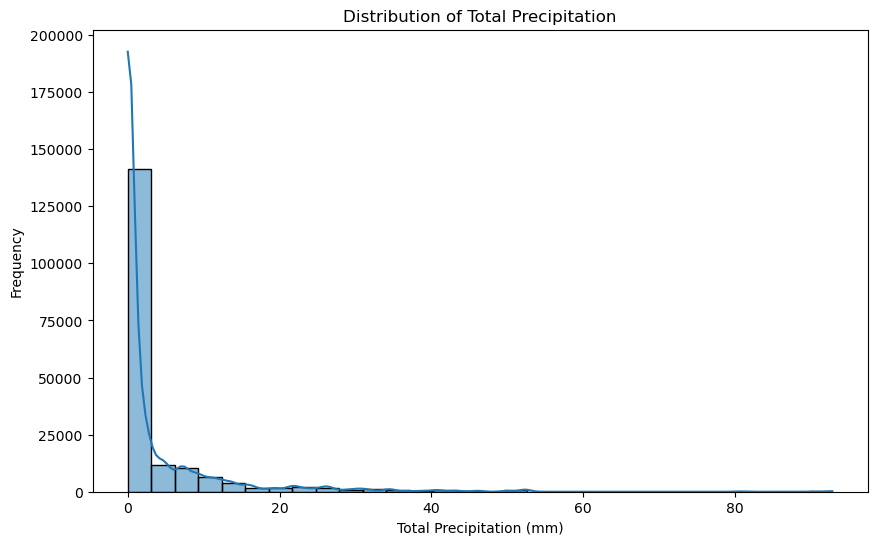

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# as can be seen there some missing values in the TOTAL_PRECIPITATION column
# Histogram to check the distribution of 'TOTAL_PRECIPITATION'
plt.figure(figsize=(10, 6))
sns.histplot(df_event_log_visits['TOTAL_PRECIPITATION'].dropna(), kde=True, bins=30)
plt.title('Distribution of Total Precipitation')
plt.xlabel('Total Precipitation (mm)')
plt.ylabel('Frequency')
plt.show()


In [111]:
# Calculating basic statistics for 'TOTAL_PRECIPITATION'
precipitation_stats = df_event_log_visits['TOTAL_PRECIPITATION'].describe()

print("Statistics for 'TOTAL_PRECIPITATION':")
print(precipitation_stats)


Statistics for 'TOTAL_PRECIPITATION':
count    186073.000000
mean          3.623578
std           8.119595
min           0.000000
25%           0.000000
50%           0.200000
75%           3.000000
max          92.800000
Name: TOTAL_PRECIPITATION, dtype: float64


In [112]:
# Calculating the median for 'TOTAL_PRECIPITATION'
median_precipitation = df_event_log_visits['TOTAL_PRECIPITATION'].median()

# Fill missing values with the median
df_event_log_visits['TOTAL_PRECIPITATION'].fillna(median_precipitation, inplace=True)


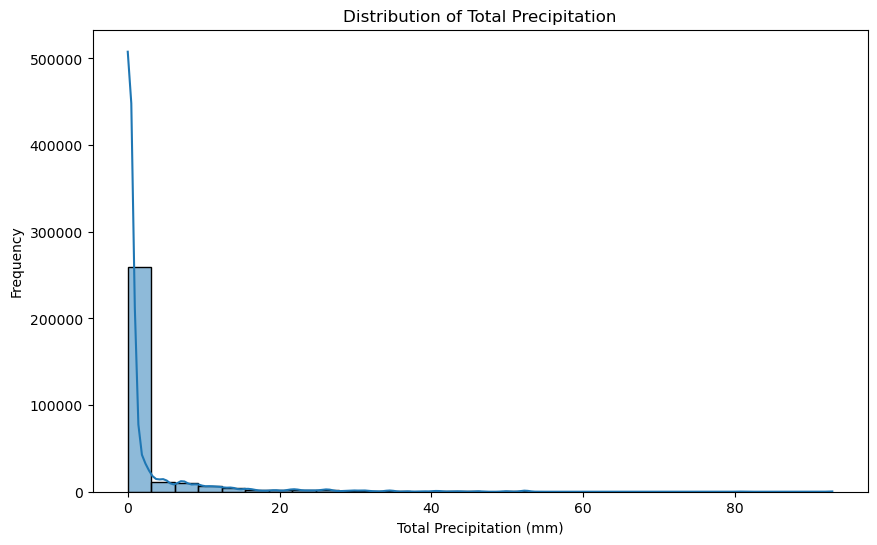

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram to check the distribution of 'TOTAL_PRECIPITATION'
plt.figure(figsize=(10, 6))
sns.histplot(df_event_log_visits['TOTAL_PRECIPITATION'].dropna(), kde=True, bins=30)
plt.title('Distribution of Total Precipitation')
plt.xlabel('Total Precipitation (mm)')
plt.ylabel('Frequency')
plt.show()

In [114]:
# Calculating basic statistics for 'TOTAL_PRECIPITATION'
precipitation_stats = df_event_log_visits['TOTAL_PRECIPITATION'].describe()

print("Statistics for 'TOTAL_PRECIPITATION':")
print(precipitation_stats)


Statistics for 'TOTAL_PRECIPITATION':
count    303877.000000
mean          2.296359
std           6.569005
min           0.000000
25%           0.000000
50%           0.200000
75%           0.800000
max          92.800000
Name: TOTAL_PRECIPITATION, dtype: float64


In [115]:
df_event_log_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303877 entries, 0 to 303876
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   SID                    303877 non-null  object             
 1   SEX                    303877 non-null  int64              
 2   DOB                    303877 non-null  datetime64[ns]     
 3   DOD                    11535 non-null   datetime64[ns]     
 4   ED_POSTAL_CODE         303877 non-null  object             
 5   FACILITY_ID            303877 non-null  object             
 6   FACILITY_NAME          303877 non-null  object             
 7   VISIT_ID               303877 non-null  object             
 8   VISIT_AGE              303877 non-null  float64            
 9   CTAS                   303877 non-null  float64            
 10  DEPART_DISPOSITION_ID  303439 non-null  object             
 11  Activity               303877 non-null 

## IMAGING_DONE and LABS_DONE

In [116]:
# Loading the Excel file for imaging data
imaging_data = pd.read_excel("October2023_Data\INC10447_ED_VISIT_IMAGES_20230929.xlsx")

# Loading the CSV file for lab tests data
labs_data = pd.read_csv("October2023_Data\INC10447_ED_VISIT_LABS_20230929.csv")

# Displaying the first few rows to ensure correct data loading
print("Imaging Data:")
print(imaging_data.head())
print("Labs Data:")
print(labs_data.head())

Imaging Data:
          SID   ED_VISIT_ID ED_SERVICE_DATE IMAGE_REPORTED_DATE  \
0  STDY111111  VISIT2102120      2021-07-12          2021-07-12   
1  STDY111113  VISIT1942974      2020-05-26          2020-05-27   
2  STDY111113  VISIT1942974      2020-05-26          2020-05-27   
3  STDY111115  VISIT1996593      2020-10-08          2020-10-08   
4  STDY111116  VISIT1424440      2017-03-19          2017-03-19   

     IMAGE_TEST_NAME  
0  CHEST DUAL ENERGY  
1          HAND LEFT  
2      SCAPHOID LEFT  
3          FOOT LEFT  
4   CHEST PA+LATERAL  
Labs Data:
          SID   ED_VISIT_ID ED_SERVICE_DATE LAB_REPORTED_DATE    LAB_TEST_NAME
0  STDY111111  VISIT2102120     12-JUL-2021       12-JUL-2021        ANION GAP
1  STDY111111  VISIT2102120     12-JUL-2021       12-JUL-2021  BILIRUBIN;TOTAL
2  STDY111111  VISIT2102120     12-JUL-2021       12-JUL-2021              CBC
3  STDY111111  VISIT2102120     12-JUL-2021       12-JUL-2021         CHLORIDE
4  STDY111111  VISIT2102120     12-JUL-

In [117]:
# Merging based on 'ED_VISIT_ID'
df_event_log_visits = pd.merge(
    df_event_log_visits,
    imaging_data[['ED_VISIT_ID']],  
    left_on='VISIT_ID', 
    right_on='ED_VISIT_ID',
    how='left', 
    indicator='Imaging_Merge_Indicator'
)

# Creating a new column to indicate if imaging was done
df_event_log_visits['Imaging_Done'] = df_event_log_visits['Imaging_Merge_Indicator'].apply(lambda x: x == 'both')



In [118]:
# Merging based on 'ED_VISIT_ID'
df_event_log_visits = pd.merge(
    df_event_log_visits,
    labs_data[['ED_VISIT_ID']],  
    left_on='VISIT_ID',
    right_on='ED_VISIT_ID',
    how='left',
    indicator='Labs_Merge_Indicator'
)

# Creating a new column to indicate if lab tests were done
df_event_log_visits['Labs_Done'] = df_event_log_visits['Labs_Merge_Indicator'].apply(lambda x: x == 'both')


In [120]:
df_event_log_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876729 entries, 0 to 1876728
Data columns (total 41 columns):
 #   Column                   Dtype              
---  ------                   -----              
 0   SID                      object             
 1   SEX                      int64              
 2   DOB                      datetime64[ns]     
 3   DOD                      datetime64[ns]     
 4   ED_POSTAL_CODE           object             
 5   FACILITY_ID              object             
 6   FACILITY_NAME            object             
 7   VISIT_ID                 object             
 8   VISIT_AGE                float64            
 9   CTAS                     float64            
 10  DEPART_DISPOSITION_ID    object             
 11  Activity                 object             
 12  Start_Time               datetime64[ns, UTC]
 13  End_Time                 object             
 14  Duration_hours           float64            
 15  TIME_OF_THE_DAY          object 

## Deleting columns that were created during the creation of new features and are not needed anymore

In [122]:
# List of columns to drop
columns_to_drop = ['FACILITY_NAME',
    'Area_Type', 
    'Country', 
    'Postal_Code', 
    'Place_Name', 
    'Province', 
    'Province_Code', 
    'First_3_Digits', 
    'Date', 
      'ED_VISIT_ID_x', 'Imaging_Merge_Indicator', 'ED_VISIT_ID_y', 'Labs_Merge_Indicator'
]

# Dropping the specified columns
df_event_log_visits.drop(columns=columns_to_drop, inplace=True)

# Displaying the updated DataFrame to confirm the changes
print(df_event_log_visits.head())


          SID  SEX        DOB DOD ED_POSTAL_CODE FACILITY_ID      VISIT_ID  \
0  STDY111126    1 1997-01-19 NaT        A0B 3K0         HSC  VISIT2354278   
1  STDY111126    1 1997-01-19 NaT        A0B 3K0         HSC  VISIT2354278   
2  STDY111126    1 1997-01-19 NaT        A0B 3K0         HSC  VISIT2354278   
3  STDY111131    1 2000-05-02 NaT        A0E 1P0         HSC  VISIT2233914   
4  STDY111131    1 2000-05-02 NaT        A0E 1P0         HSC  VISIT2233914   

   VISIT_AGE  CTAS DEPART_DISPOSITION_ID  ... Distance_to_Hospital  \
0  26.166667   3.0                 TLWBS  ...            55.947701   
1  26.166667   3.0                 TLWBS  ...            55.947701   
2  26.166667   3.0                 TLWBS  ...            55.947701   
3  22.000000   4.0                     D  ...           243.167901   
4  22.000000   4.0                     D  ...           243.167901   

  Is_NL_Holiday Age_Category  Visit_Season Visit_Frequency  Prior_LWBS  \
0         False        Adult        

In [123]:
df_event_log_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876729 entries, 0 to 1876728
Data columns (total 28 columns):
 #   Column                 Dtype              
---  ------                 -----              
 0   SID                    object             
 1   SEX                    int64              
 2   DOB                    datetime64[ns]     
 3   DOD                    datetime64[ns]     
 4   ED_POSTAL_CODE         object             
 5   FACILITY_ID            object             
 6   VISIT_ID               object             
 7   VISIT_AGE              float64            
 8   CTAS                   float64            
 9   DEPART_DISPOSITION_ID  object             
 10  Activity               object             
 11  Start_Time             datetime64[ns, UTC]
 12  End_Time               object             
 13  Duration_hours         float64            
 14  TIME_OF_THE_DAY        object             
 15  Is_Deceased            int32              
 16  Latitude          

In [124]:
# Dropping the 'ED_POSTAL_CODE' column 
df_event_log_visits.drop(columns=['ED_POSTAL_CODE'], inplace=True)


In [127]:
# One-Hot Encoding for 'FACILITY_ID'
df_event_log_visits = pd.get_dummies(df_event_log_visits, columns=['FACILITY_ID'])


In [128]:
# Frequency Encoding for 'DEPART_DISPOSITION_ID'
depart_disposition_freq = df_event_log_visits['DEPART_DISPOSITION_ID'].value_counts()

# Mapping the frequency to the 'DEPART_DISPOSITION_ID' column
df_event_log_visits['DEPART_DISPOSITION_Frequency'] = df_event_log_visits['DEPART_DISPOSITION_ID'].map(depart_disposition_freq)


In [130]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal Encoding for 'Activity'
ordinal_encoder = OrdinalEncoder()

# Fitting the encoder to 'Activity' and transform it
df_event_log_visits['Activity_Encoded'] = ordinal_encoder.fit_transform(df_event_log_visits[['Activity']])


In [129]:
# Creating a binary outcome for 'DEPART_DISPOSITION'
df_event_log_visits['Is_LWBS'] = df_event_log_visits['DEPART_DISPOSITION_ID'].isin(['TLWBS', 'RLWBS']).astype(int)


In [149]:
df_event_log_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876729 entries, 0 to 1876728
Data columns (total 31 columns):
 #   Column                        Dtype              
---  ------                        -----              
 0   SID                           object             
 1   SEX                           int64              
 2   DOB                           datetime64[ns]     
 3   DOD                           datetime64[ns]     
 4   VISIT_ID                      object             
 5   VISIT_AGE                     float64            
 6   CTAS                          float64            
 7   Start_Time                    datetime64[ns, UTC]
 8   End_Time                      datetime64[ns, UTC]
 9   Duration_hours                float64            
 10  Is_Deceased                   int32              
 11  Latitude                      float64            
 12  Longitude                     float64            
 13  Distance_to_Hospital          float64            
 14  Is

In [134]:
# Dropping original columns after encoding
columns_to_drop = ['DEPART_DISPOSITION_ID', 'Activity']

df_event_log_visits.drop(columns=columns_to_drop, inplace=True)


In [135]:
# Converting 'End_Time' to datetime
df_event_log_visits['End_Time'] = pd.to_datetime(df_event_log_visits['End_Time'], errors='coerce')


In [138]:
from sklearn.preprocessing import OrdinalEncoder

# Defining the order for 'TIME_OF_THE_DAY'
time_order = [['Early Morning to Morning', 'Late Morning to Late Afternoon','Evening to Night']]

# Creating an OrdinalEncoder with the specified order
ordinal_encoder = OrdinalEncoder(categories=time_order)

# Applying the encoder to 'TIME_OF_THE_DAY'
df_event_log_visits['TIME_OF_THE_DAY_Ordinal'] = ordinal_encoder.fit_transform(df_event_log_visits[['TIME_OF_THE_DAY']])


In [148]:
columns_to_drop = ['TIME_OF_THE_DAY']

df_event_log_visits.drop(columns=columns_to_drop, inplace=True)

In [151]:
# Defining the order for 'Visit_Season'
season_order = [['Winter', 'Spring', 'Summer', 'Fall']]

# Creating an OrdinalEncoder with the specified order
ordinal_encoder = OrdinalEncoder(categories=season_order)

# Applying the encoder to 'Visit_Season'
df_event_log_visits['Visit_Season_Ordinal'] = ordinal_encoder.fit_transform(df_event_log_visits[['Visit_Season']])


In [152]:
columns_to_drop = ['Visit_Season']

df_event_log_visits.drop(columns=columns_to_drop, inplace=True)

In [153]:
df_event_log_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876729 entries, 0 to 1876728
Data columns (total 31 columns):
 #   Column                        Dtype              
---  ------                        -----              
 0   SID                           object             
 1   SEX                           int64              
 2   DOB                           datetime64[ns]     
 3   DOD                           datetime64[ns]     
 4   VISIT_ID                      object             
 5   VISIT_AGE                     float64            
 6   CTAS                          float64            
 7   Start_Time                    datetime64[ns, UTC]
 8   End_Time                      datetime64[ns, UTC]
 9   Duration_hours                float64            
 10  Is_Deceased                   int32              
 11  Latitude                      float64            
 12  Longitude                     float64            
 13  Distance_to_Hospital          float64            
 14  Is

In [160]:
df_event_log_visits.head()

,SID,SEX,DOB,DOD,VISIT_ID,VISIT_AGE,CTAS,Start_Time,End_Time,Duration_hours,...,FACILITY_ID_BUR,FACILITY_ID_CGH,FACILITY_ID_GBC,FACILITY_ID_HSC,FACILITY_ID_SCM,DEPART_DISPOSITION_Frequency,Is_LWBS,Activity_Encoded,TIME_OF_THE_DAY_Ordinal,Visit_Season_Ordinal
0,STDY111126,1,1997-01-19,NaT,VISIT2354278,26.166667,3.0,2023-03-04 23:08:00+00:00,2023-03-05 00:30:00+00:00,1.366667,...,False,False,False,True,False,104361.0,1,6.0,2.0,1.0
1,STDY111126,1,1997-01-19,NaT,VISIT2354278,26.166667,3.0,2023-03-04 23:09:00+00:00,2023-03-05 00:30:00+00:00,1.366667,...,False,False,False,True,False,104361.0,1,5.0,2.0,1.0
2,STDY111126,1,1997-01-19,NaT,VISIT2354278,26.166667,3.0,2023-03-05 00:30:00+00:00,2023-03-05 00:30:00+00:00,1.366667,...,False,False,False,True,False,104361.0,1,3.0,2.0,1.0
3,STDY111131,1,2000-05-02,NaT,VISIT2233914,22.000000,4.0,2022-05-30 08:10:00+00:00,2022-05-30 11:20:00+00:00,3.166667,...,False,False,False,True,False,1681318.0,0,6.0,1.0,1.0
4,STDY111131,1,2000-05-02,NaT,VISIT2233914,22.000000,4.0,2022-05-30 08:21:00+00:00,2022-05-30 11:20:00+00:00,3.166667,...,False,False,False,True,False,1681318.0,0,5.0,1.0,1.0


In [ ]:
# Save to CSV
df_event_log_visits.to_csv('df_event_log_visits_for_ML.csv', index=False)
